In [1]:
# Import Libraries 
import pandas as pd
from statsmodels.formula.api import ols, glm
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
from scipy.stats import linregress
import seaborn as sns
from scipy.stats import norm
import numpy as np


In [2]:
# Preprocessed Rental Properties Dataset
df = pd.read_csv('../data/curated/Curated_Rental_Property_Data.csv')


In [3]:
df.head()
df = df.drop(columns="Unnamed: 0")
df

,Unnamed: 0.1,property_link,suburb,address,property_type,price,closest_school,Bedrooms,Bathrooms,Garages
0,0,https://www.domain.com.au/14-curringa-ct-churc...,CHURCHILL VIC 3842,"14 Curringa Ct, CHURCHILL VIC 3842",0,320,1.0,3,1,0
1,1,https://www.domain.com.au/31-suzanne-street-da...,DANDENONG VIC 3175,"31 Suzanne Street, DANDENONG VIC 3175",0,465,0.7,3,1,1
2,2,https://www.domain.com.au/65-bruckner-drive-po...,POINT COOK VIC 3030,"65 Bruckner Drive, POINT COOK VIC 3030",0,420,1.3,4,2,2
3,3,https://www.domain.com.au/16-june-square-ringw...,RINGWOOD NORTH VIC 3134,"16 June Square, RINGWOOD NORTH VIC 3134",0,620,0.5,3,2,6
4,4,https://www.domain.com.au/1-76-mckean-street-b...,BOX HILL NORTH VIC 3129,"1/76 McKean Street, BOX HILL NORTH VIC 3129",0,620,0.7,4,2,1
...,...,...,...,...,...,...,...,...,...,...
2976,2995,https://www.domain.com.au/2-7-finchley-av-glen...,GLENROY VIC 3046,"2/7 Finchley Av, GLENROY VIC 3046",1,390,0.5,2,1,1
2977,2996,https://www.domain.com.au/2b-parklands-crescen...,BRIGHTON EAST VIC 3187,"2B Parklands Crescent, BRIGHTON EAST VIC 3187",1,14,0.6,4,3,2
2978,2997,https://www.domain.com.au/38-luxe-terrace-poin...,POINT COOK VIC 3030,"38 Luxe Terrace, POINT COOK VIC 3030",1,480,0.6,3,2,2
2979,2998,https://www.domain.com.au/97a-ogilvie-street-e...,ESSENDON VIC 3040,"97A Ogilvie Street, ESSENDON VIC 3040",1,980,0.4,4,2,2


In [4]:
# Visualisation 
y = df.price



In [9]:
# Pearson's correlation 

cormat = df.corr()
pearson_metric = round(cormat,2)
display(pearson_metric)

pearson_metric.to_csv("../data/curated/pearson_metric.csv")

,Unnamed: 0.1,property_type,price,closest_school,Bedrooms,Bathrooms,Garages
Unnamed: 0.1,1.00,0.82,0.14,-0.15,-0.18,0.11,-0.11
property_type,0.82,1.00,0.03,-0.16,-0.47,-0.10,-0.31
price,0.14,0.03,1.00,-0.02,0.27,0.28,0.12
closest_school,-0.15,-0.16,-0.02,1.00,0.11,0.09,0.06
Bedrooms,-0.18,-0.47,0.27,0.11,1.00,0.61,0.54
Bathrooms,0.11,-0.10,0.28,0.09,0.61,1.00,0.39
Garages,-0.11,-0.31,0.12,0.06,0.54,0.39,1.00


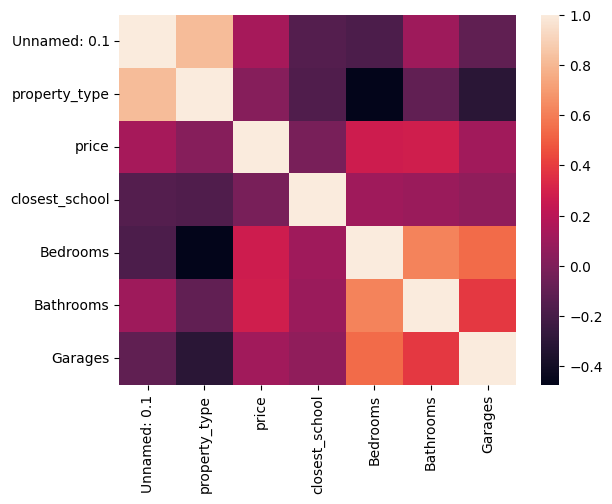

In [8]:
sns.heatmap(cormat)
plt.savefig('../plots/' + 'Pearson_Correlation_Heat_Map.png')

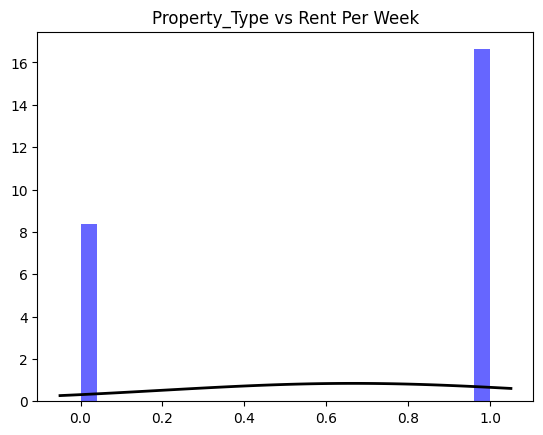

In [42]:
# Property Type vs Rent Per Week
mu, std = norm.fit(df.property_type) 
plt.hist(df.property_type, bins=25, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "Property_Type vs Rent Per Week"
plt.title(title)
  
plt.show()

# plt.savefig("Bedrooms vs Rent Per Week.png")



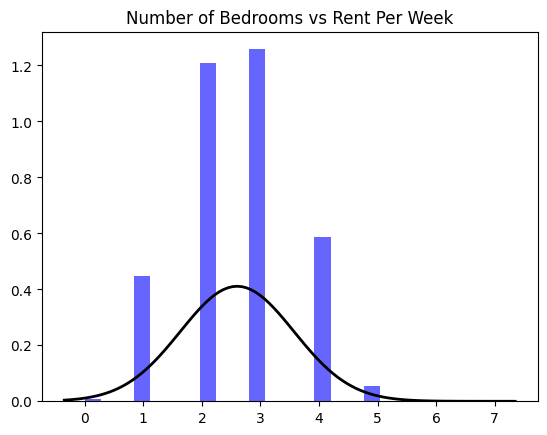

In [43]:
# Bedrooms vs Rent Per Week
mu, std = norm.fit(df.Bedrooms) 
plt.hist(df.Bedrooms, bins=25, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "Number of Bedrooms vs Rent Per Week"
plt.title(title)
  
plt.show()

# plt.savefig("Bedrooms vs Rent Per Week.png")



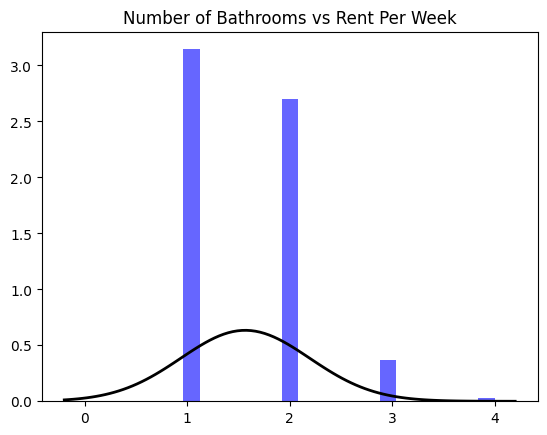

In [44]:
# Bathrooms vs Rent Per Week 

mu, std = norm.fit(df.Bathrooms) 
plt.hist(df.Bathrooms, bins=25, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "Number of Bathrooms vs Rent Per Week"
plt.title(title)
  
plt.show()

# plt.savefig("Bedrooms vs Rent Per Week.png")




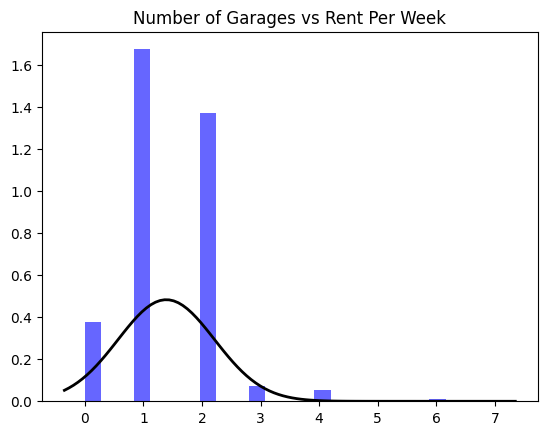

In [45]:
# Garages vs Rent Per Week 

mu, std = norm.fit(df.Garages) 
plt.hist(df.Garages, bins=25, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "Number of Garages vs Rent Per Week"
plt.title(title)
  
plt.show()

# plt.savefig("Bedrooms vs Rent Per Week.png")





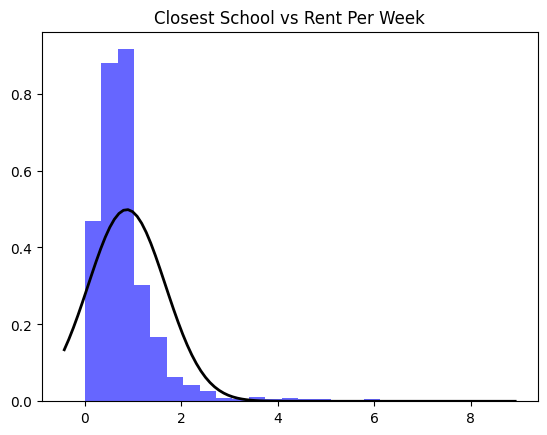

In [48]:
# Closest School vs Rent Per Week
mu, std = norm.fit(df.closest_school) 
plt.hist(df.closest_school, bins=25, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "Closest School vs Rent Per Week"
plt.title(title)
  
plt.show()

# plt.savefig("Bedrooms vs Rent Per Week.png")



In [671]:
# Linear Regression Model: useful tool for predicting a continuous response 


Best subset regression

This approach involves identifying a subset of the p predictors that
we believe to be related to the response. We then fit a model
using least squares on the reduced set of variables.

• To perform best subset selection, we fit a separate least
squares regression for each possible combination of the p
predictors.

• Forward Stepwise Selection and Backward Stepwise
Selection both search through p(p + 1)/2 models to identify
the best one.

In [678]:
# Best Subset Regression 
x_columns = ["Property_Type", "Bedrooms", "Bathrooms", "Garages", "Closest_Schools"]
y = df["Rent"]



In [679]:
# creating function to get model statistics
import numpy as np
import statsmodels.api as sm
def get_stats():
    x = df[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()



                                 OLS Regression Results                                
Dep. Variable:                   Rent   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              3494.
Date:                Wed, 21 Sep 2022   Prob (F-statistic):                        0.00
Time:                        15:14:52   Log-Likelihood:                         -12846.
No. Observations:                1989   AIC:                                  2.570e+04
Df Residuals:                    1984   BIC:                                  2.573e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [680]:
# Remove feature with alrgest p-value until all p-values are below 0.05
# x_columns = ["Property_Type", "Bedrooms", "Bathrooms", "Garages", "Closest_Schools"]

x_columns.remove("Garages")
get_stats()

# No 

                                 OLS Regression Results                                
Dep. Variable:                   Rent   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              4366.
Date:                Wed, 21 Sep 2022   Prob (F-statistic):                        0.00
Time:                        15:17:39   Log-Likelihood:                         -12847.
No. Observations:                1989   AIC:                                  2.570e+04
Df Residuals:                    1985   BIC:                                  2.572e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [681]:
x_columns.remove("Closest_Schools")
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                   Rent   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              5820.
Date:                Wed, 21 Sep 2022   Prob (F-statistic):                        0.00
Time:                        15:17:59   Log-Likelihood:                         -12847.
No. Observations:                1989   AIC:                                  2.570e+04
Df Residuals:                    1986   BIC:                                  2.572e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [682]:
# Add features back to check p-value 

x_columns = ["Property_Type", "Bedrooms", "Bathrooms", "Garages"]

def get_stats():
    x = df[x_columns]
    results = sm.OLS(y, x).fit()
    print(results.summary())
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                   Rent   R-squared (uncentered):                   0.898
Model:                            OLS   Adj. R-squared (uncentered):              0.898
Method:                 Least Squares   F-statistic:                              4366.
Date:                Wed, 21 Sep 2022   Prob (F-statistic):                        0.00
Time:                        15:18:14   Log-Likelihood:                         -12847.
No. Observations:                1989   AIC:                                  2.570e+04
Df Residuals:                    1985   BIC:                                  2.572e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [677]:
# Smallest AIC 
x_columns_step = ["Property_Type", "Bedrooms", "Bathrooms", "Garages"] 

